In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5639

Best Fitness:	1400.1543
Solution:	1400.0000
Diff:		0.1543

[0:11:36][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.4835

Best Fitness:	1400.0846
Solution:	1400.0000
Diff:		0.0846

[0:22:29][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5197

Best Fitness:	1400.1559
Solution:	1400.0000
Diff:		0.1559

[0:32:55][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5563

Best Fitness:	1400.1424
Solution:	1400.0000
Diff:		0.1424

[0:43:03][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5390

Best Fitness:	1400.1632
Solution:	1400.0000
Diff:		0.1632

[0:52:19][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5234

Best Fitness:	1400.1084
Solution:	1400.0000
Diff:		0.1084

[1:01:28][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5589

Best Fitness:	1400.1871
Solution:	1400.0000
Diff:		0.1871

[1:10:39][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5690

Best Fitness:	1400.1405
Solution:	1400.0000
Diff:		0.1405

[1:19:58][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5595

Best Fitness:	1400.2135
Solution:	1400.0000
Diff:		0.2135

[1:29:27][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5737

Best Fitness:	1400.2024
Solution:	1400.0000
Diff:		0.2024

[1:37:56][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5717

Best Fitness:	1400.1411
Solution:	1400.0000
Diff:		0.1411

[1:45:56][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5648

Best Fitness:	1400.1161
Solution:	1400.0000
Diff:		0.1161

[1:53:53][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5503

Best Fitness:	1400.1537
Solution:	1400.0000
Diff:		0.1537

[2:01:48][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5382

Best Fitness:	1400.1275
Solution:	1400.0000
Diff:		0.1275

[2:09:50][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5480

Best Fitness:	1400.1127
Solution:	1400.0000
Diff:		0.1127

[2:17:52][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5731

Best Fitness:	1400.1705
Solution:	1400.0000
Diff:		0.1705

[2:25:22][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5420

Best Fitness:	1400.1468
Solution:	1400.0000
Diff:		0.1468

[2:32:26][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5151

Best Fitness:	1400.0628
Solution:	1400.0000
Diff:		0.0628

[2:39:19][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5511

Best Fitness:	1400.2548
Solution:	1400.0000
Diff:		0.2548

[2:46:13][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5233

Best Fitness:	1400.1614
Solution:	1400.0000
Diff:		0.1614

[2:53:15][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5774

Best Fitness:	1400.1314
Solution:	1400.0000
Diff:		0.1314

[3:00:22][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.4952

Best Fitness:	1400.0958
Solution:	1400.0000
Diff:		0.0958

[3:06:43][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5593

Best Fitness:	1400.1477
Solution:	1400.0000
Diff:		0.1477

[3:12:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5263

Best Fitness:	1400.1053
Solution:	1400.0000
Diff:		0.1053

[3:18:33][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5375

Best Fitness:	1400.1636
Solution:	1400.0000
Diff:		0.1636

[3:24:24][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5634

Best Fitness:	1400.1999
Solution:	1400.0000
Diff:		0.1999

[3:30:13][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5519

Best Fitness:	1400.1627
Solution:	1400.0000
Diff:		0.1627

[3:36:14][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5291

Best Fitness:	1400.1794
Solution:	1400.0000
Diff:		0.1794

[3:41:28][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5654

Best Fitness:	1400.1205
Solution:	1400.0000
Diff:		0.1205

[3:46:28][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5453

Best Fitness:	1400.1444
Solution:	1400.0000
Diff:		0.1444

[3:51:20][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5648

Best Fitness:	1400.0730
Solution:	1400.0000
Diff:		0.0730

[3:56:13][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5607

Best Fitness:	1400.1176
Solution:	1400.0000
Diff:		0.1176

[4:01:05][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5188

Best Fitness:	1400.1132
Solution:	1400.0000
Diff:		0.1132

[4:05:58][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5486

Best Fitness:	1400.1598
Solution:	1400.0000
Diff:		0.1598

[4:10:18][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5453

Best Fitness:	1400.0473
Solution:	1400.0000
Diff:		0.0473

[4:14:15][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5247

Best Fitness:	1400.1390
Solution:	1400.0000
Diff:		0.1390

[4:18:11][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5376

Best Fitness:	1400.1359
Solution:	1400.0000
Diff:		0.1359

[4:22:04][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5551

Best Fitness:	1400.1404
Solution:	1400.0000
Diff:		0.1404

[4:25:56][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5195

Best Fitness:	1400.1518
Solution:	1400.0000
Diff:		0.1518

[4:29:48][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5407

Best Fitness:	1400.1379
Solution:	1400.0000
Diff:		0.1379

[4:33:14][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5541

Best Fitness:	1400.0901
Solution:	1400.0000
Diff:		0.0901

[4:36:16][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5946

Best Fitness:	1400.2099
Solution:	1400.0000
Diff:		0.2099

[4:39:18][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5207

Best Fitness:	1400.1858
Solution:	1400.0000
Diff:		0.1858

[4:42:24][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5321

Best Fitness:	1400.1290
Solution:	1400.0000
Diff:		0.1290

[4:45:25][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5369

Best Fitness:	1400.1814
Solution:	1400.0000
Diff:		0.1814

[4:48:25][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5164

Best Fitness:	1400.1287
Solution:	1400.0000
Diff:		0.1287

[4:51:06][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5096

Best Fitness:	1400.1022
Solution:	1400.0000
Diff:		0.1022

[4:53:32][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5534

Best Fitness:	1400.1556
Solution:	1400.0000
Diff:		0.1556

[4:55:57][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5742

Best Fitness:	1400.1472
Solution:	1400.0000
Diff:		0.1472

[4:58:20][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5207

Best Fitness:	1400.0812
Solution:	1400.0000
Diff:		0.0812

[5:00:44][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	1400.5359

Best Fitness:	1400.1706
Solution:	1400.0000
Diff:		0.1706

[5:03:14][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:03:14

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,0.566405,0.802197,0.716413,0.368349,0.491369,0.85964,0.4999,0.526276,0.582477,0.467489,...,0.39076,0.745292,0.44608,0.454221,0.477374,0.524123,0.36215,0.649742,0.763395,50
294,0.566405,0.802197,0.716413,0.368349,0.491369,0.85964,0.4999,0.526276,0.582477,0.467489,...,0.39076,0.745292,0.44608,0.454221,0.477374,0.524123,0.36215,0.649742,0.763395,50
295,0.566405,0.802197,0.716413,0.368349,0.491369,0.85964,0.4999,0.526276,0.582477,0.467489,...,0.39076,0.745292,0.44608,0.454221,0.477374,0.524123,0.36215,0.649742,0.763395,50
296,0.566405,0.802197,0.716413,0.368349,0.491369,0.85964,0.4999,0.526276,0.582477,0.467489,...,0.39076,0.745292,0.44608,0.454221,0.477374,0.524123,0.36215,0.649742,0.763395,50
297,0.566405,0.802197,0.716413,0.368349,0.491369,0.85964,0.4999,0.526276,0.582477,0.467489,...,0.39076,0.745292,0.44608,0.454221,0.477374,0.524123,0.36215,0.649742,0.763395,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.15433112397863624

Best error for run 1: 0.08457278936111834

Best error for run 2: 0.15594907924219115

Best error for run 3: 0.1424360540431735

Best error for run 4: 0.1631849705743207

Best error for run 5: 0.10840290868395641

Best error for run 6: 0.18711118263627213

Best error for run 7: 0.1405112737422769

Best error for run 8: 0.21345600576569268

Best error for run 9: 0.20242938056230741

Best error for run 10: 0.14114388046596105

Best error for run 11: 0.11611398893933256

Best error for run 12: 0.15374954557205456

Best error for run 13: 0.12753083161601353

Best error for run 14: 0.1127018741426582

Best error for run 15: 0.17051766672216218

Best error for run 16: 0.14675995626885197

Best error for run 17: 0.06278483419941949

Best error for run 18: 0.25481150054019963

Best error for run 19: 0.16140596250897943

Best error for run 20: 0.13143594353391563

Best error for run 21: 0.09575996294211109

Best error for run 22: 0.14774005107005905

Best error for run 23: 0.1052944423054214

Best error for run 24: 0.1635864637898976

Best error for run 25: 0.1998552477746216

Best error for run 26: 0.16266592478018538

Best error for run 27: 0.17942003243592808

Best error for run 28: 0.12053309537691348

Best error for run 29: 0.14437144472958607

Best error for run 30: 0.07296108626951536

Best error for run 31: 0.11764681453269077

Best error for run 32: 0.11318307824808471

Best error for run 33: 0.15978570331299125

Best error for run 34: 0.04729636364845646

Best error for run 35: 0.1389579264000531

Best error for run 36: 0.1359423260269068

Best error for run 37: 0.14044016809884852

Best error for run 38: 0.1518468747190127

Best error for run 39: 0.13789077646788428

Best error for run 40: 0.09011826598907646

Best error for run 41: 0.20991678913787837

Best error for run 42: 0.18581002926134715

Best error for run 43: 0.12899168467083655

Best error for run 44: 0.18141906292089516

Best error for run 45: 0.12869106354401083

Best error for run 46: 0.10215779578288675

Best error for run 47: 0.1555824894221587

Best error for run 48: 0.14721757884512954

Best error for run 49: 0.08118928627118294

Best error for run 50: 0.17063418253019336

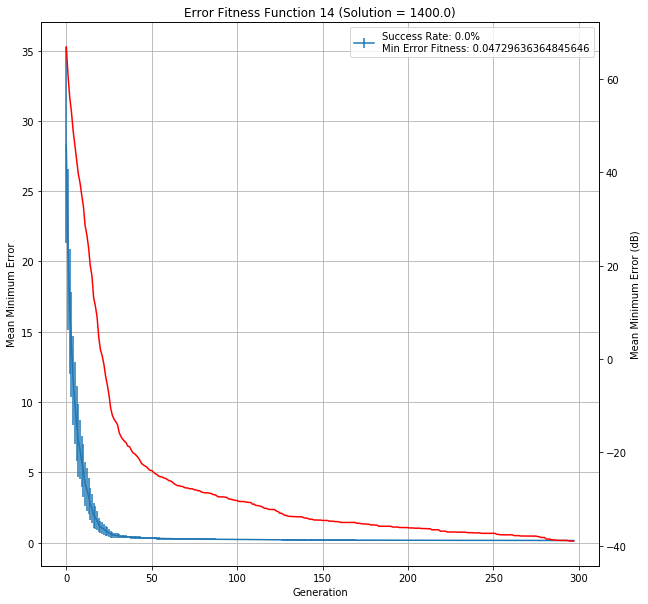

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.9,0.154331,0.084573,0.155949,0.142436,0.163185,0.108403,...,0.181419,0.128691,0.102158,0.155582,0.147218,0.081189,0.170634,0.142122,5:03:14,90000
